In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Stijn de Boer (s1003731), 
Ron Hommelsheim (s1003731),
David Leeftink (s4496612).

### Exercise 4: Role of selection in GA’ s

In [2]:
def binary_GA(l=100, n_iter=1500):
    """
    (1+1) GA for solving the Counting Ones problem. 
    
    :param l (int): length of the bit string
    :param n_iter (int): number of iterations of the algorithm    
    
    :return x (NumPy array) bit string with maximum sum of elements
    :return F (n_iter x 3)
    :return max_score_reached (Bool) True if l ones are present in final string
    """
    # random initial bit sequence 
    x   = np.random.randint(2, size=l)
    mutation_rate = 1/l
    F = np.zeros(n_iter) # fitness
    
    for i in range(n_iter):
        # Invert x_m at each bit with p = 1/l    
        invert_idx = np.random.binomial(size=l, n=1, p=mutation_rate) # bernoulli trial for each gene with p=1/l
        x_m        = np.abs(x-invert_idx)
        
        # Compute fitness, keep best solution
        f_x, f_xm = np.sum(x), np.sum(x_m)
        F[i] = np.maximum(f_x, f_xm)

        if f_xm > f_x: 
            x = x_m
            
    converged = np.sum(x)==l
    return x, F, converged

def plot_convergence(F, l, filepath=None):
    n_iter = F.shape[0]
    plt.figure(figsize=(8,5))    
    plt.plot(np.arange(n_iter), F, label='best')
    plt.axhline(y=l, linestyle=':', color='black', label='maximum score')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Convergence of (1+1) GA on Counting Ones problem')
    plt.legend()
    if filepath is not None:
        plt.savefig(filepath)
    plt.show()

converged: True


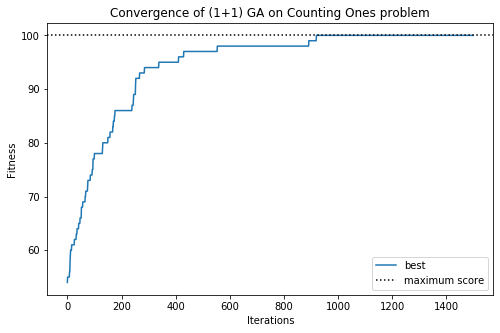

In [3]:
l, n_iter = 100, 1500
x, F, converged = binary_GA(l=l, n_iter=n_iter)
print(f'converged: {converged}')
plot_convergence(F, l)#, filepath='A1_4a_GA.pdf')

In [4]:
# 10 runs
l, n_iter = 100, 1500
n_trials, n_converged = 10, 0

for i in range(n_trials):
    x, F, converged = binary_GA(l=l, n_iter=n_iter)
    if converged:
        n_converged += 1

print(f'{n_converged}/{n_trials}')       
# 100 runs
l, n_iter = 100, 1500
n_trials, n_converged = 100, 0

for i in range(n_trials):
    x, F, converged = binary_GA(l=l, n_iter=n_iter)
    if converged:
        n_converged += 1

print(f'{n_converged}/{n_trials}')  

8/10
89/100


  ### c. Always replace $x$ with $x_m$

In [5]:
def binary_GA_altered(l=100, n_iter=1500):
    """
    (1+1) GA for solving the Counting Ones problem.
    always accepts the next generation.
    
    :param l (int): length of the bit string
    :param n_iter (int): number of iterations of the algorithm    
    
    :return x (NumPy array) bit string with maximum sum of elements
    :return F (NumPy array) maximum score as a fucntion of iterations
    :return max_score_reached (Bool) True if l ones are present in final string
    """
    # random initial bit sequence 
    x   = np.random.randint(2, size=l)
    mutation_rate = 1/l
    F = np.zeros(n_iter) # fitness
    
    for i in range(n_iter):
        # Invert x_m at each bit with p = 1/l    
        invert_idx = np.random.binomial(size=l, n=1, p=mutation_rate) # bernoulli trial for each gene with p=1/l
        x_m        = np.abs(x-invert_idx)
        
        # Compute fitness, keep best solution
        f_x, f_xm = np.sum(x), np.sum(x_m)
        F[i] = np.maximum(f_x, f_xm)
        x = x_m
        
            
    converged = np.sum(x)==l
    return x, F, converged

converged: False


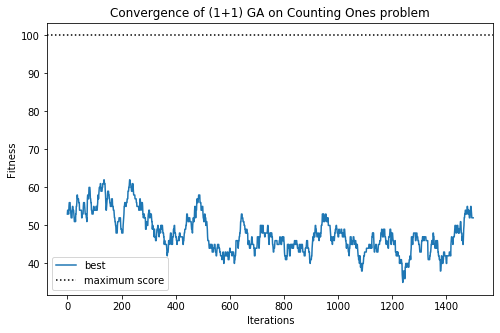

0/10
0/100


In [6]:
# 1 run
l, n_iter = 100, 1500
x, F, converged = binary_GA_altered(l=l, n_iter=n_iter)
print(f'converged: {converged}')
plot_convergence(F, l)#, filepath='A1_4c.pdf')

# 10 runs
l, n_iter = 100, 1500
n_trials, n_converged = 10, 0

for i in range(n_trials):
    x, F, converged = binary_GA_altered(l=l, n_iter=n_iter)
    if converged:
        n_converged += 1

print(f'{n_converged}/{n_trials}')       
# 100 runs
l, n_iter = 10, 1500
n_trials, n_converged = 100, 0

for i in range(n_trials):
    x, F, converged = binary_GA_altered(l=l, n_iter=n_iter)
    if converged:
        n_converged += 1

print(f'{n_converged}/{n_trials}')  

### Exercise 6: Memetic algorithm for the TSP

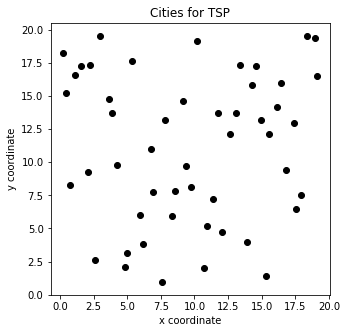

In [7]:
file = open('file-tsp.txt','r')
cities = []
for line in file:
    x, y = line.split()
    x, y = float(x), float(y)
    cities.append([x,y])

    
cities = np.array(cities)
plt.figure(figsize=(5,5))
plt.scatter(cities[:,0], cities[:,1],color='black')
plt.title('Cities for TSP')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
#plt.savefig('A1_6a.pdf')
plt.show()

# Make distance matrix
N, D = cities.shape
distance_matrix = np.zeros((N,N))
for i in range(N):
    for j in range(i, N):
        distance_matrix[i,j] = np.linalg.norm(cities[i]-cities[j])
        distance_matrix[j,i] = distance_matrix[i,j]

In [8]:
def get_distance(cities_idx, distance_matrix):
    """
    determines the (euclidean) distance between a list of cities
    
    :param cities (NxD NumPy array) ordered list of cities
    
    :return dist (float) total distance for the given order of cities
    """
    N = len(cities_idx)
    city_sequence = cities[cities_idx]
    dist = 0
    for i in range(N-1):
        #dist += np.linalg.norm(city_sequence[i+1]-city_sequence[i])
        dist += distance_matrix[cities_idx[i+1], cities_idx[i]]
    return dist + distance_matrix[cities_idx[-1],cities_idx[0]]

def simple_EA_TSP(distance_matrix, S, K, p_m=0.02, p_c=1, n_iter=1500):
    """
     GA for solving the TSP problem.
    
     :param cities (NxD NumPy array) 
     :param S (int) population size
     :param K (int) number of indivuals chosen in tournament selection
     :param p_m (float) mutation probability
     :param p_c (float) cross-over probability
     :param n_iter (int): number of iterations of the algorithm    
    
     :return x (NumPy array) order of cities
     :return F (n_iterx3 NumPy array) distances as a function of iterations: best, worst, average
    """
    # random initial bit sequence 
    N, D = cities.shape
    X = np.array([np.arange(N) for i in range(S)])
    [np.random.shuffle(X[i]) for i in range(S)]
    F    = np.zeros((n_iter, 3)) # distances: (best, worst, average)
    
    for i in tqdm(range(n_iter)):
        # apply crossover
        X = crossover(X, p_c)
        
        # apply mutation  
        X = mutation(X, p_m)
        
        # evaluate individuals
        distances = np.array([get_distance(x, distance_matrix) for x in X])
        F[i,:] = distances.min(), distances.max(), np.mean(distances)
        
        # generate next generation: Binary tournament selection
        X = tournament_selection(X, distances, K)
        
    return X[np.argmax(distances)], F

def memetic_TSP(distance_matrix, S, K, p_m=0.02, p_c=1, n_iter=1500):
    """
     GA for solving the TSP problem.
    
     :param cities (NxD NumPy array) 
     :param S (int) population size
     :param K (int) number of indivuals chosen in tournament selection
     :param p_m (float) mutation probability
     :param p_c (float) cross-over probability
     :param n_iter (int): number of iterations of the algorithm    
    
     :return x (NumPy array) order of cities
     :return F (n_iterx3 NumPy array) distances as a function of iterations: best, worst, average
    """
    # random initial bit sequence 
    N, D = cities.shape
    X = np.array([np.arange(N) for i in range(S)])
    [np.random.shuffle(X[i]) for i in range(S)]
    F    = np.zeros((n_iter, 3)) # distances: (best, worst, average)
    
    for i in tqdm(range(n_iter)):
        # apply crossover
        X = crossover(X, p_c)
        
        # apply mutation  
        X = mutation(X, p_m)
        
        # Local search
        X = local_search_TSP(X, distance_matrix)
        
        # evaluate individuals
        distances = np.array([get_distance(x, distance_matrix) for x in X])
        F[i,:] = distances.min(), distances.max(), np.mean(distances)
        
        # generate next generation: Binary tournament selection
        X = tournament_selection(X, distances, K)
        
    return X[np.argmin(distances)], F


def crossover(X, p_c):
    """
    Apply two-point crossover to a population of chromosomes
    
    return: X: population with parents replaced by offspring
    """
    N, S = X.shape
    X_new = np.zeros_like(X)
    
    for j in range(int(X.shape[0]/2)):
        p = np.random.uniform(0,1)  
        idx1, idx2 = np.random.choice(np.arange(N), 2, replace=False)          
        parent1, parent2 = X[idx1], X[idx2]
        if p_c>p:
            cp1 = np.random.randint(0, high=S-1)
            cp2 = np.random.randint(cp1+1, high=S)            
            offspring1, offspring2 = np.zeros(S)-1, np.zeros(S)-1
            offspring1[cp1:cp2], offspring2[cp1:cp2] = parent1[cp1:cp2], parent2[cp1:cp2]
            
            # Starting from cp2, fill in missing cities in order they appeared in parent
            for n in range(cp2, cp2 + S-(cp2-cp1)):
                # loop over empty indices
                child_idx = n%S
                for m in range(cp2, cp2 + S):
                    parent_idx = m%S
                    if parent2[parent_idx] not in offspring1:
                        offspring1[child_idx] = parent2[parent_idx]
                        break
            # other way around
            for n in range(cp2, cp2 + S-(cp2-cp1)):
                child_idx = n%S
                for m in range(cp2, cp2 + S):
                    parent_idx = m%S
                    if parent1[parent_idx] not in offspring2:
                        offspring2[child_idx] = parent1[parent_idx]
                        break
                                
            X_new[j*2], X_new[j*2+1] = offspring1, offspring2
        else:
            X_new[j*2], X_new[j*2+1] = parent1, parent2

    return X_new



def mutation(X, p_m):
    """
    Apply reverse sequence mutation to a population of chromosomes
    
    return: X: Mutated population 
    """
    N, S = X.shape
    X_new = np.zeros_like(X)        
    
    # for each x, determine if mutation takes places
    for k, x in enumerate(X):    
        p = np.random.uniform(0,1)            
        if p_m>p:
            # Take 2 random indices and swap them
            idx1, idx2 = np.random.choice(S, 2, replace=False)
            x_m = X[k]
            x_idx1, x_idx2 = x_m[idx1], x_m[idx2]        
            x_m[idx1], x_m[idx2] = x_idx2, x_idx1
            X_new[k] = x_m
        else:
            X_new[k] = X[k]    
       
    return X_new
        
def tournament_selection(X, distances, K=2):
    """
    Apply binary tournament selection to a population of binary chromosomes
    
    return: X: selection-filtered population 
    """
    N, S  = X.shape
    X_new = np.zeros_like(X)
    
    for i in range(N):
        # Choose K (2) members uniformly
        x1, x2 = np.random.choice(np.arange(N), size=K)        
        
        # Add member with lowest distances
        if distances[x1] <= distances[x2]:
            X_new[i] = X[x1]
        else:
            X_new[i] = X[x2]
    
    return X_new
def flip(ind, i, j):
    ind[i:j] = np.flip(ind[i:j])
    return ind
def local_search_TSP(X, distance_matrix):
    X_new = np.zeros_like(X)
    for n, ind in enumerate(X):
        best_dist = get_distance(ind, distance_matrix)
        best_flip = (0, 0)
        for i in range(len(ind)):
            for j in range(i, len(ind)):
                ind = flip(ind, i, j)
                if get_distance(ind,distance_matrix) < best_dist:
                    best_flip = (i, j)
                    best_dist = get_distance(ind, distance_matrix)
                ind = flip(ind, i, j)
        ind = flip(ind, *best_flip)
        X_new[n]=ind    
    return X_new
    
def plot_TSP_convergence(F, filepath=None, memetic =False):
    n_iter = F.shape[0]
    plt.figure(figsize=(8,5))    
    plt.plot(np.arange(n_iter), F[:,0], label='best')
    plt.plot(np.arange(n_iter), F[:,1], label='worst')
    plt.plot(np.arange(n_iter), F[:,2], label='average')
    plt.xlabel('Iterations')
    plt.ylabel('Distance')
    if memetic:
        plt.title('Convergence of memetic algorithm on TSP problem')
    else:
        plt.title('Convergence of standard EA algorithm on TSP problem')
    plt.legend()
    if filepath is not None:
        plt.savefig(filepath)
    plt.show()

100%|██████████| 1500/1500 [00:31<00:00, 47.64it/s]


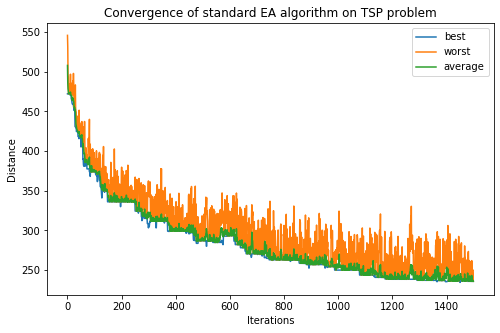

In [9]:
x, F = simple_EA_TSP(distance_matrix,S=10, K=2, p_m=0.1, p_c=0.7, n_iter=1500)
plot_TSP_convergence(F)#, 'A1_6b1')

100%|██████████| 100/100 [00:44<00:00,  2.26it/s]


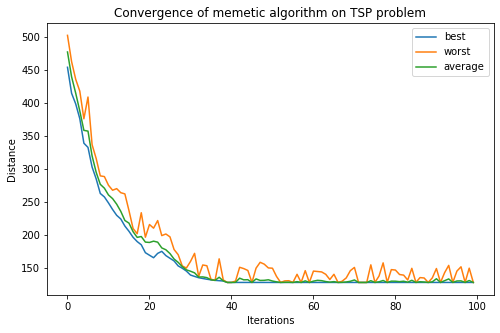

In [10]:
x, F = memetic_TSP(distance_matrix,S=10, K=2, p_m=0.1, p_c=0.7, n_iter=100)
plot_TSP_convergence(F,memetic=True)#, 'A1_6b2')

### Second dataset

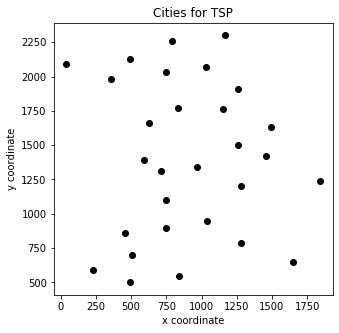

In [11]:
file = open('27_cities.txt','r')
cities = []
for line in file:
    x, y = line.split()
    x, y = float(x), float(y)
    cities.append([x,y])

    
cities = np.array(cities)
plt.figure(figsize=(5,5))
plt.scatter(cities[:,0], cities[:,1],color='black')
plt.title('Cities for TSP')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
#plt.savefig('A1_6a.pdf')
plt.show()

# Make distance matrix
N, D = cities.shape
distance_matrix = np.zeros((N,N))
for i in range(N):
    for j in range(i, N):
        distance_matrix[i,j] = np.linalg.norm(cities[i]-cities[j])
        distance_matrix[j,i] = distance_matrix[i,j]

100%|██████████| 1500/1500 [00:10<00:00, 138.82it/s]


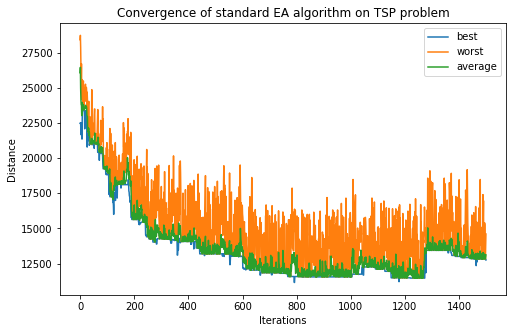

In [12]:
x, F = simple_EA_TSP(distance_matrix,S=10, K=2, p_m=0.1, p_c=0.7, n_iter=1500)
plot_TSP_convergence(F)#,'A1_6c1')

100%|██████████| 100/100 [00:10<00:00,  9.51it/s]


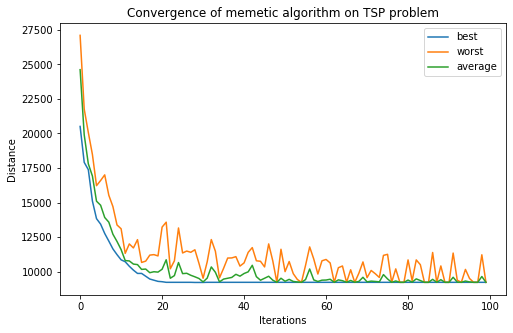

In [13]:
x, F = memetic_TSP(distance_matrix,S=10, K=2, p_m=0.1, p_c=0.7, n_iter=100)
plot_TSP_convergence(F, 'A1_6c2',memetic=True)